## 1.3.1 핵심 인물 찾기

In [0]:
users = [
         {"id": 0, "name":"Hero"},
         {"id": 1, "name":"Dunn"},
         {"id": 2, "name":"Sue"},
         {"id": 3, "name":"Chi"},
         {"id": 4, "name":"Thor"},
         {"id": 5, "name":"Clive"},
         {"id": 6, "name":"Hicks"},
         {"id": 7, "name":"Devin"},
         {"id": 8, "name":"Kate"},
         {"id": 9, "name":"Klein"}
]

friendships = [(0,1), (0,2), (1,2), (1,3), (2,3), (3,4),
               (4,5), (5,6), (5,7), (6,8), (7,8), (8,9)]


for user in users:
  user["friends"] = []

"""for i,j in friendships:
  users[i]["friends"].extend([{"id":users[j]["id"], "name":users[j]["name"]}])
  users[j]["friends"].extend([{"id" : users[i]["id"], "name":users[i]["name"]}])
  """
for i,j in friendships:
  users[i]["friends"].append(users[j])
  users[j]["friends"].append(users[i])

In [0]:
def num_users(user):
  return len(user["friends"])
total_connections = sum(num_users(user) for user in users)

num_user = len(users)
avg_connections = total_connections/num_user
print("total_connections :", total_connections,"\n avg_connections :", avg_connections)

total_connections : 24 
 avg_connections : 2.4


In [0]:
num_friends_by_id = [(user["id"], num_users(user)) for user in users]

sorted(num_friends_by_id, key=lambda num_friends : num_friends[1] , reverse=True)

[(1, 3),
 (2, 3),
 (3, 3),
 (5, 3),
 (8, 3),
 (0, 2),
 (4, 2),
 (6, 2),
 (7, 2),
 (9, 1)]

## 1.3.2 데이터 과학자 추천하기

In [0]:
def friends_of_friends_ids_bad(user):
  return [foaf["id"]
          for friend in user["friends"]
          for foaf in friend["friends"]]

print(friends_of_friends_ids_bad(users[0]))

[0, 2, 3, 0, 1, 3]


In [0]:
from collections import Counter

def not_the_same(user,other_user):
  return user["id"] != other_user["id"]

def not_friends(user, other_user):
  return all(not_the_same(friend,other_user) for friend in user["friends"])

def friends_of_friend_ids(user):
  return Counter(foaf["id"] 
                 for friend in user["friends"]
                 for foaf in friend["friends"]
                 if not_the_same(user, foaf)
                 and not_friends(user, foaf))

In [0]:
print(friends_of_friend_ids(users[0]))

Counter({3: 2})


In [0]:
interests = [
             (0,"Hadoop"),(0,"Big Data"),(0,"HBase"),(0,"Java"),
             (0,"Spark"),(0,"Storm"),(0,"Cassandra"),(1,"NoSQL"),
             (1,"MongoDB"),(1,"Cassandra"),(1,"HBase"),
             (1,"Postgres"),(2,"Python"),(2,"scikit-learn"),
             (2,"scipy"),(2,"numpy"),(2,"statsmodels"),
             (2,"pandas"),(3,"R"),(3,"Python"),(3,"statistics"),
             (3,"regression"),(3,"probability"),(4,"machine learning"),
             (4,"regression"),(4,"decision trees"),(4,"libsvm"),
             (5,"Python"),(5,"R"),(5,"Java"),(5,"C++"),
             (5,"Haskell"),(5,"programming languages"),
             (6,"statistics"),(6,"probabiltiy"),(6,"mathmatics"),
             (6,"theory"),(7,"machine learning"),(7,"scikit-learn"),
             (7,"Mahout"),(7,"neural networks"),(8,"neural networks"),
             (8,"deep learning"),(8,"Big Data"),
             (8,"artificial intelligence"), (9,"Hadoop"),(9,"Java"),
             (9,"MapReduce"),(9,"Big Data")
]

In [0]:
def data_scientists_who_like(target_interest):
  return [user_id 
          for ueser_id, uesr_interest in interests 
          if uesr_interest == target_interest]

## 호출할때 마다 관심사를 전부 봐야해서 나쁜코드이다 각 관심사에 대한 사용자 인덱스를 만드는것이 좀 더 좋다.

In [0]:
from collections import defaultdict

user_ids_by_interest = defaultdict(list)
interests_by_user_id = defaultdict(list)

for user_id, user_interest in interests:
  user_ids_by_interest[ user_interest].append(user_id)
  interests_by_user_id[user_id].append(user_interest)


print(user_ids_by_interest)
print(interests_by_user_id)


defaultdict(<class 'list'>, {'Hadoop': [0, 9], 'Big Data': [0, 8, 9], 'HBase': [0, 1], 'Java': [0, 5, 9], 'Spark': [0], 'Storm': [0], 'Cassandra': [0, 1], 'NoSQL': [1], 'MongoDB': [1], 'Postgres': [1], 'Python': [2, 3, 5], 'scikit-learn': [2, 7], 'scipy': [2], 'numpy': [2], 'statsmodels': [2], 'pandas': [2], 'R': [3, 5], 'statistics': [3, 6], 'regression': [3, 4], 'probability': [3], 'machine learning': [4, 7], 'decision trees': [4], 'libsvm': [4], 'C++': [5], 'Haskell': [5], 'programming languages': [5], 'probabiltiy': [6], 'mathmatics': [6], 'theory': [6], 'Mahout': [7], 'neural networks': [7, 8], 'deep learning': [8], 'artificial intelligence': [8], 'MapReduce': [9]})
defaultdict(<class 'list'>, {0: ['Hadoop', 'Big Data', 'HBase', 'Java', 'Spark', 'Storm', 'Cassandra'], 1: ['NoSQL', 'MongoDB', 'Cassandra', 'HBase', 'Postgres'], 2: ['Python', 'scikit-learn', 'scipy', 'numpy', 'statsmodels', 'pandas'], 3: ['R', 'Python', 'statistics', 'regression', 'probability'], 4: ['machine learnin

In [0]:
def most_common_interests_with(user_id):
  return Counter(interests_id
                 for interest in interests_by_user_id[user_id]
                 for interests_id in user_ids_by_interest[interest]
                 if interests_id != user_id)
  
print(most_common_interests_with(0))

Counter({9: 3, 1: 2, 8: 1, 5: 1})


## 1.3.3 연봉과 경력

In [0]:
salaries_and_tenures =[
                       (83000, 8.7), (88000, 8.1),
                       (48000, 0.7), (76000, 6),
                       (69000, 6.5), (76000, 7.5),
                       (60000, 2.5), (83000, 10),
                       (48000, 1.9), (63000, 4.2)
]

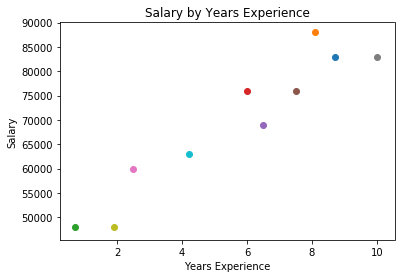

In [0]:
import matplotlib.pyplot as plt

for salaries, tenuers in salaries_and_tenures:
  plt.scatter(tenuers,salaries)

plt.title("Salary by Years Experience")
plt.ylabel("Salary")
plt.xlabel("Years Experience")
plt.show()

In [0]:
salary_by_tenure = defaultdict(list)

for salary, tenure in salaries_and_tenures:
  salary_by_tenure[tenure].append(salary)

average_salary_by_tenure ={
    tenure : sum(salaries) / len(salaries)
    for tenure, salaries in salary_by_tenure.items()
}

print(salary_by_tenure)
print(average_salary_by_tenure)

#둘이 똑같은거나 다름 없다.(값이 전부 다르기때문) 구간별로 나누는게 좀 더 효율적

defaultdict(<class 'list'>, {8.7: [83000], 8.1: [88000], 0.7: [48000], 6: [76000], 6.5: [69000], 7.5: [76000], 2.5: [60000], 10: [83000], 1.9: [48000], 4.2: [63000]})
{8.7: 83000.0, 8.1: 88000.0, 0.7: 48000.0, 6: 76000.0, 6.5: 69000.0, 7.5: 76000.0, 2.5: 60000.0, 10: 83000.0, 1.9: 48000.0, 4.2: 63000.0}


In [0]:
def tenure_bucket(tenure):
  if tenure < 2:
    return "less than two"
  elif tenure <5:
    return "between two and five"
  else:
    return "more than five"

In [47]:
salary_by_tenure_bucket = defaultdict(list)

for salary, tenure in salaries_and_tenures:
  bucket = tenure_bucket(tenure)
  salary_by_tenure_bucket[bucket].append(salary)

print(salary_by_tenure_bucket)

defaultdict(<class 'list'>, {'more than five': [83000, 88000, 76000, 69000, 76000, 83000], 'less than two': [48000, 48000], 'between two and five': [60000, 63000]})


In [49]:
average_salary_by_bucket ={
    tenure_bucket : sum(salaries) / len(salaries)
    for tenure_bucket, salaries in salary_by_tenure_bucket.items()
}

print(average_salary_by_bucket)

{'more than five': 79166.66666666667, 'less than two': 48000.0, 'between two and five': 61500.0}


## 1.3.4 유료계정

In [0]:
Paid_list = [
             (0.7, "paid"),(1.9, "unpaid"),(2.5, "paid"),(4.2, "unpaid"),(6, "unpaid"),(6.5, "unpaid"),(7.5, "unpaid"),(8.1, "unpaid"),(8.7, "paid"),(10, "paid")
]

def predict_paid_or_unpaid(years_experience):
  if years_experience < 3.0:
    return "paid"
  elif years_experience < 8.5:
    return "unpaid"
  else:
    return "paid"

## 1.3.5 관심 주제


관심사 찾기 방법 예시

1. 모든 관심사를 소문자로 변환한다.
2. 모든 관심사를 단어를 기준으로 쪼갠다.
3. 각 단어의 수를 센다

In [51]:
words_and_counts = Counter(word 
                           for user, interest in interests 
                           for word in interest.lower().split())

for word, count in words_and_counts.most_common():
  if count > 1:
    print(word, count)

big 3
data 3
java 3
python 3
learning 3
hadoop 2
hbase 2
cassandra 2
scikit-learn 2
r 2
statistics 2
regression 2
machine 2
neural 2
networks 2
